# Optimizing Convolutional Neural Networks
{{ badge }}

In this lecture, we will be focusing on improving the performance of our CNNs by building deeper CNNs, adding batch normalization, and using image augmentation techniques.

We will start by discussing the benefits of building deeper CNNs by stacking multiple convolutional layers before applying max pooling. This allows the network to learn more complex features and can improve performance on tasks such as image classification.

Next, we will cover the use of batch normalization in CNNs. Batch normalization helps to stabilize the training process and can improve the performance of the network.

Finally, we will discuss image augmentation techniques such as rotation, flipping, and zooming. These techniques help to increase the size and diversity of the training dataset, which can improve the performance of the CNN.

## Table of Contents <a name="toc"></a>
* [Deeper CNNs](#deep_cnns)
* [Batch Normalization](#batchnorm)
* [Image Augmentation](#image_aug)

## Preparing Dataset

We will be using the CIFAR-10 dataset to demonstrate the techniques for optimizing CNNs. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# set random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [9]:
# load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print('x_train shape:', x_train.shape, 'y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3) y_train shape: (50000, 1)


In [10]:
# reshape the target
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [11]:
# create index labels dictionary
index_labels = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

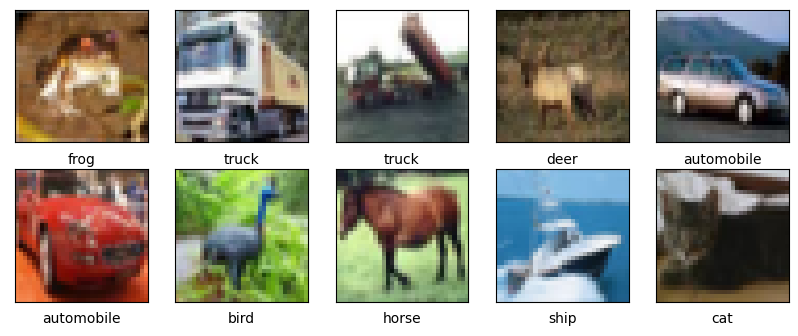

In [12]:
# plot the first 10 images in the training set and their labels
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(index_labels[y_train[i]])

In [14]:
# normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:
# one-hot encode the labels
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

## Deeper CNNs <a name="deep_cnns"></a>
[Back to Top](#toc)

One way to improve the performance of CNNs is by building deeper networks. This means adding more layers to the network, allowing it to learn more complex features and representations of the input data.

In a typical CNN architecture, a series of convolutional layers are followed by a max pooling layer. The convolutional layers are responsible for extracting features from the input data, while the max pooling layer is used for down-sampling the feature maps.

When building deeper CNNs, we can stack multiple convolutional layers before applying the max pooling. This allows the network to learn more complex features, as the deeper layers can learn from the features extracted by the previous layers.

For example, instead of having a single convolutional layer followed by a max pooling layer, we could have two or three convolutional layers stacked before the max pooling. This can improve the performance of the network on tasks such as image classification.

In [18]:
# build a deep cnn model
deep_cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

deep_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [19]:
# compile the model
deep_cnn_model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [20]:
# create an early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# train the model
deep_cnn_model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/20


2023-01-26 23:33:48.127667: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


782/782 [==============================] - 46s 58ms/step - loss: 1.7758 - categorical_accuracy: 0.3348 - val_loss: 1.3929 - val_categorical_accuracy: 0.4832
Epoch 2/20
782/782 [==============================] - 47s 60ms/step - loss: 1.3680 - categorical_accuracy: 0.5057 - val_loss: 1.1679 - val_categorical_accuracy: 0.5831
Epoch 3/20
782/782 [==============================] - 49s 62ms/step - loss: 1.1944 - categorical_accuracy: 0.5751 - val_loss: 1.1121 - val_categorical_accuracy: 0.6139
Epoch 4/20
782/782 [==============================] - 50s 64ms/step - loss: 1.0829 - categorical_accuracy: 0.6165 - val_loss: 0.8825 - val_categorical_accuracy: 0.6903
Epoch 5/20
782/782 [==============================] - 52s 67ms/step - loss: 1.0000 - categorical_accuracy: 0.6501 - val_loss: 0.8471 - val_categorical_accuracy: 0.7064
Epoch 6/20
782/782 [==============================] - 52s 67ms/step - loss: 0.9414 - categorical_accuracy: 0.6730 - val_loss: 0.8834 - val_categorical_accuracy: 0.6993
Epo

### Batch Normalization <a name="batchnorm"></a>
[Back to Top](#toc)

Batch normalization is a technique used to improve the performance and stability of deep neural networks. It normalizes the activations of the previous layer for each mini-batch, by subtracting the batch mean and dividing by the batch standard deviation.

The main motivation for batch normalization is to eliminate the internal covariate shift, which is the change in the distribution of the inputs to a layer caused by the change in the parameters of the previous layers during training. This can slow down the training process and make the network more difficult to optimize.

By normalizing the activations, batch normalization helps the network learn faster and converge to better solutions. It also makes the training process more robust to the initialization and the choice of hyperparameters.

Batch normalization is typically applied to the input of the activation function, before the non-linearity. It can also be applied to the output of the activation function, before the next linear layer.

We will be using the tf.keras.layers.BatchNormalization() layer in Keras to implement batch normalization in our CNNs. This layer takes care of the normalization for us, and we can simply add it to our model like any other layer.

In [ ]:
# build deep cnn model with batch normalization
deep_cnn_model_bn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
# compile the model
deep_cnn_model_bn.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
# create an early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# train the model
deep_cnn_model_bn.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

## Image Augmentation <a name="image_aug"></a>
[Back to Top](#toc)

Image augmentation is a technique used to artificially increase the size of a training dataset by applying random transformations to the images in the dataset. These transformations can include rotation, flipping, cropping, and scaling. 

The goal of image augmentation is to help the model generalize better by seeing the same image in different positions, scales, and orientations. This can help prevent overfitting, which occurs when a model becomes too specialized to the training dataset and performs poorly on new, unseen data.

We will be using the `tf.keras.layers.RandomRotation()` and `tf.keras.layers.RandomFlip()` layers in Keras to implement image augmentation in our CNNs. These layers take care of the augmentation for us, and we can simply add them to our model like any other layer.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


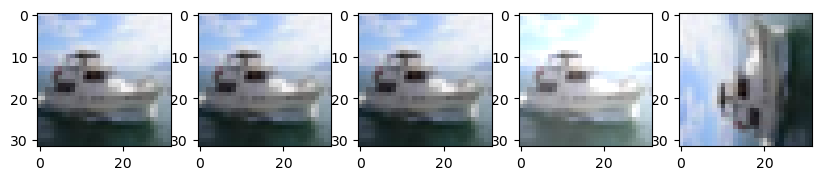

In [21]:
# pick a random image from the training set
index = np.random.randint(len(y_train))
input_image = x_train[index]

# data augmentation examples
img_flip_up_down = tf.image.random_flip_up_down(input_image) # flip up and down
img_flip_left_right = tf.image.random_flip_left_right(input_image) # flip left and right
img_flip_brightness = tf.image.random_brightness(input_image, 0.5) # change brightness
img_flip_rot90 = tf.image.rot90(input_image) # rotate 90 degrees


plt.figure(figsize=(10, 10))

plt.subplot(1, 5, 1)
plt.imshow(input_image)

plt.subplot(1, 5, 2)
plt.imshow(img_flip_up_down)

plt.subplot(1, 5, 3)
plt.imshow(img_flip_left_right)

plt.subplot(1, 5, 4)
plt.imshow(img_flip_brightness)

plt.subplot(1, 5, 5)
plt.imshow(img_flip_rot90)

In [22]:
# build deep cnn model with batchnorm and data augmentation
deep_cnn_model_bn_da = tf.keras.models.Sequential([
    # data augmentation
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

deep_cnn_model_bn_da.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
# compile the model
deep_cnn_model_bn_da.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
# create an early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# train the model
deep_cnn_model_bn_da.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])